In [26]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter
stop_words = set(stopwords.words('english')) 
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize
stemmer = ps()
from nltk.stem.cistem import Cistem
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
import seaborn

In [27]:
# DATA = '/Users/jane/Desktop/search+youtube_v4/8_41.csv'
DATA = '/Users/miriamblumenthal/Desktop/Desktop/GoogleTake2/search+youtube_v4/8_41.csv'
df = pd.read_csv(DATA)
data = df[(df['months'] == 3) | (df['months'] == 4) | (df['months'] == 5) & (df['years'] == 2020) ].dropna(subset=['query'])

data['query'].tolist()
    

    
            

['flights from BOS to LIM on Mar 6, 2020 returning Mar 16, 2020',
 'salsa antigua',
 'una noche de copas una noche loca',
 'Maria Conchita Alonso - Noche De Copas - YouTube',
 'Salsa Sensual MIX VOL. 3 [De los 80] (UNA HORA COMPLETA DE ...',
 'greyhound',
 'buffalo',
 'Rochester to Buffalo - 2 ways to travel via bus, and car - Rome2rio',
 'how to go from rochester to buffalo',
 'The Trump Administration Is Denying H-1B Visas at a Dizzying Rate ...',
 'h1b visa extension denial rate',
 'mauricio mesones',
 'Grupo para conocer peruanos en Rochester, expatriados peruanos ...',
 'https://www.yelp.com/search?find_desc=Peruvian+Food&find_loc=Rochester%2C+NY',
 'peruanos en rochester',
 'indignada translate',
 'queso panela',
 'fabian caceres chile',
 'Jetblue Cookies - Belgian Boys',
 'stroopwafel jetblue',
 'dell inspiron headphone jack not working',
 'Headphones jack not working - Dell Community',
 'Solved: Inspiron 15-7???, not detecting headphones - Dell Community',
 'vicks mentholatum',

In [69]:
#Functions

#Creating dfs

def df_jan_feb(df):
    return df[(df['months'] == 1) | (df['months'] == 2) & (df['years'] == 2020) ].dropna(subset=['query'])

def df_mar_ap(df):
    return df[(df['months'] == 3) | (df['months'] == 4) | (df['months'] == 5) | (df['months'] == 6) & (df['years'] == 2020) ].dropna(subset=['query'])

#Tokenizes/stems the queries in a df
def tokenize_stem(df):
    searches = df['query'].tolist()
    tokens = []
    punct_list ={'-',':','&','|', 'https', 'http', '...', ',', '?', '+', '(', ')', '*', '$', '@', '%', '^', '~', '.'}
    for q in searches:
        sublist = word_tokenize(q)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(token)
    return tokens
#Tokenizes/stems queries in list
def tokenize_list(searches):
    tokens = []
    punct_list ={'-',':','&','|', 'https', 'http', '...', ',', '?', '+', '(', ')', '*', '$', '@', '%', '^', '~', '.'}
    for q in searches:
        sublist = word_tokenize(q)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(token)
    return tokens

                  
#List of top terms 

def top_ten(searchlist):
    df = pd.Series(searchlist).value_counts().sort_values(ascending = False).to_frame().reset_index()
    df_new = df.rename(columns={'index':'words'})
    df_new = df_new.head(10)
    return df_new['words'].tolist()

#Creates two dicts

def make_dict(string_list):
    return { i : string_list[i] for i in range(0, len(string_list) ) }
def make_dict2(string_list):
    dict_1 = make_dict(string_list)
    return { v : k for k, v in dict_1.items()}

#Gets weekly distribution for top ten terms- wrapper function
def get_counts(data):
    
    string_list = top_ten(tokenize_stem(data))
    
    data['datetime']= pd.to_datetime(data['datetime'])
    dictOfWords = make_dict(string_list)
    dictOfWords2 = make_dict2(string_list)

    history = []
    weekly_totals = []
    labels = [] 
    for week, wdf in data.set_index('datetime').groupby(pd.Grouper(freq='W')):
        if len(wdf) >0:
            wdist = [0 for i in range(10)]
            week_label = str(week).split(' ')[0]
            labels.append(week_label)
            weekly_totals.append(len(wdf))
            weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
            words = tokenize_list(weekly_queries)
            for w in words:
                if w in dictOfWords2:
                    wdist[dictOfWords2[w]] = wdist[dictOfWords2[w]]+ 1
            history.append(wdist)
    return history



In [29]:
# data['datetime']= pd.to_datetime(data['datetime'])
# dictOfWords = make_dict(string_list)
# dictOfWords2 = make_dict2(string_list)

# history = []
# weekly_totals = []
# labels = [] 
# for week, wdf in data.set_index('datetime').groupby(pd.Grouper(freq='W')):
#     if len(wdf) >0:
#         wdist = [0 for i in range(10)]
#         week_label = str(week).split(' ')[0]
#         labels.append(week_label)
#         weekly_totals.append(len(wdf))
#         weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
#         words = tokenize_list(weekly_queries)
#         for w in words:
#             if w in dictOfWords2:
#                 wdist[dictOfWords2[w]] = wdist[dictOfWords2[w]]+ 1
#         history.append(wdist)


/Users/miriamblumenthal/opt/anaconda3/envs/covidProject/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


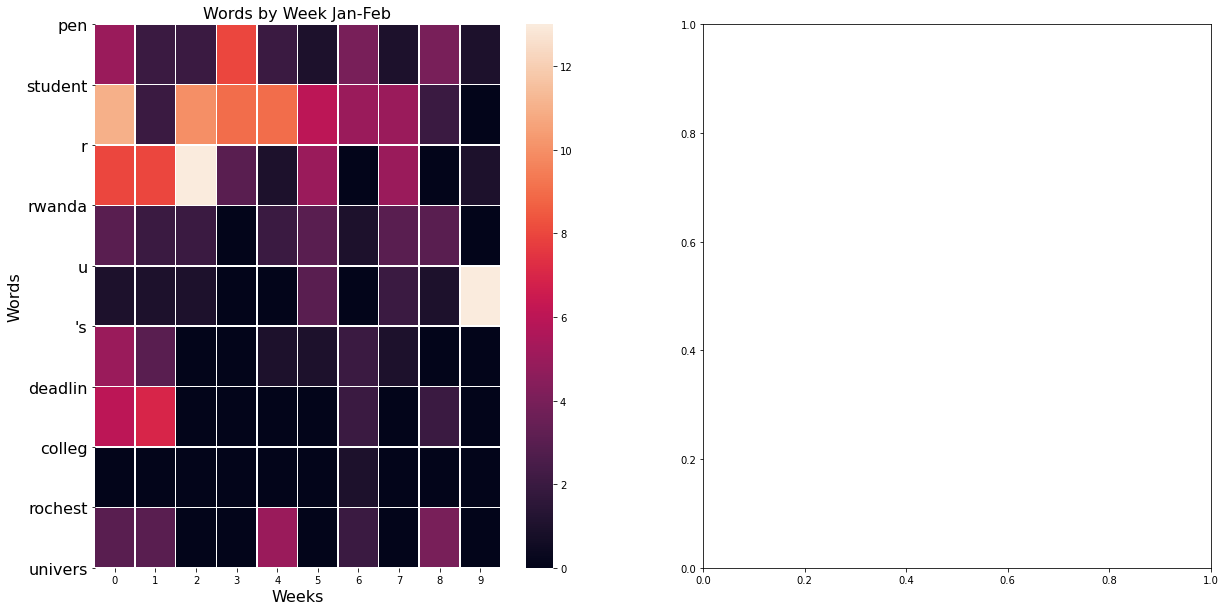

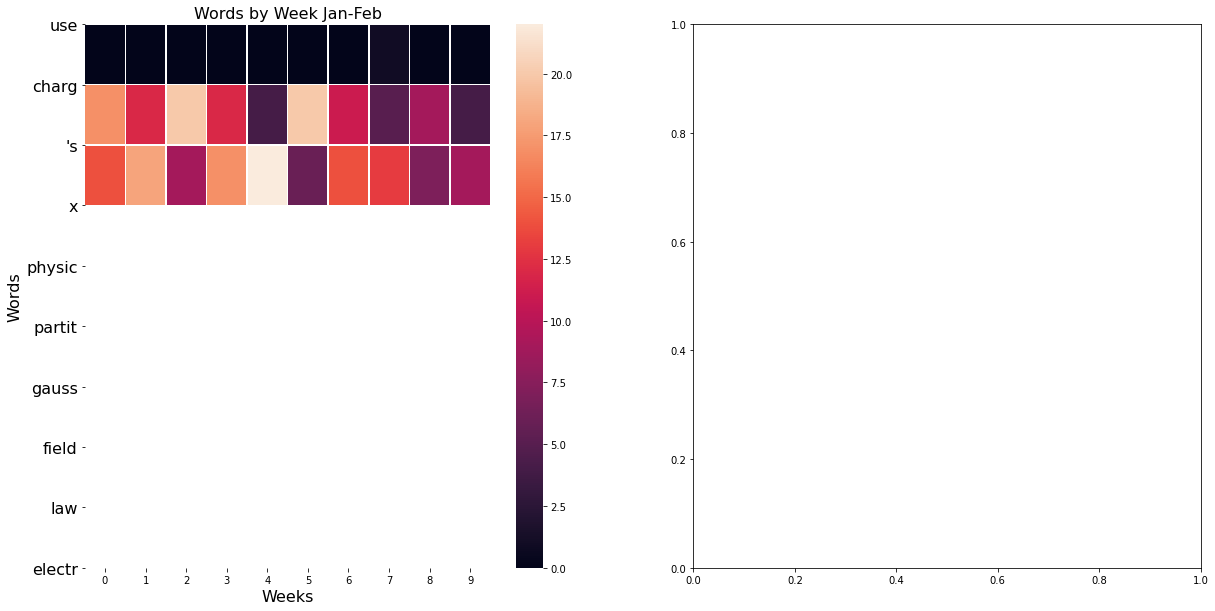

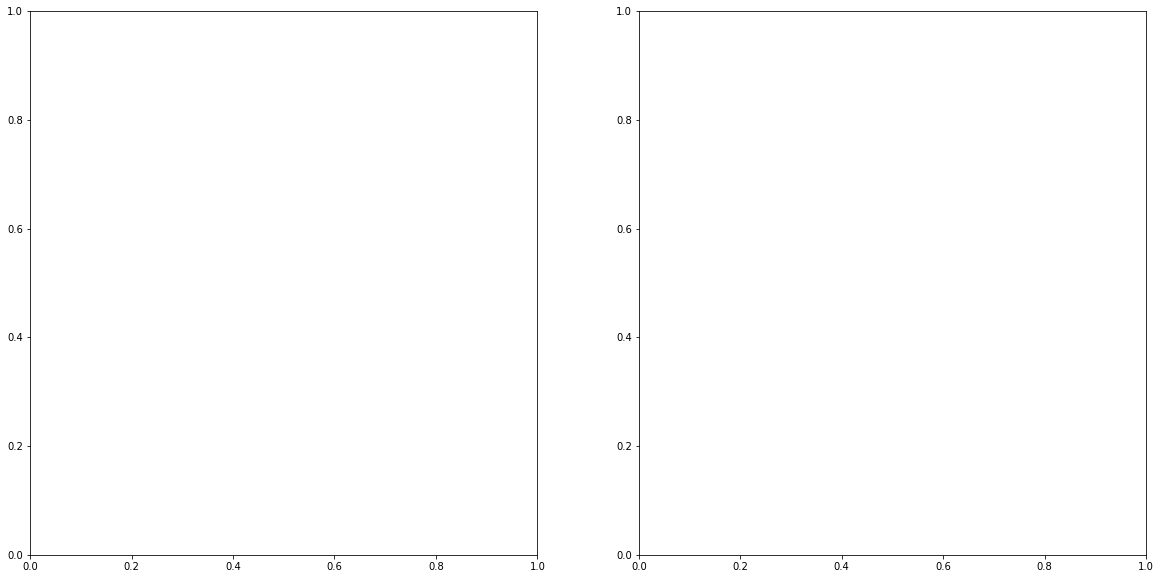

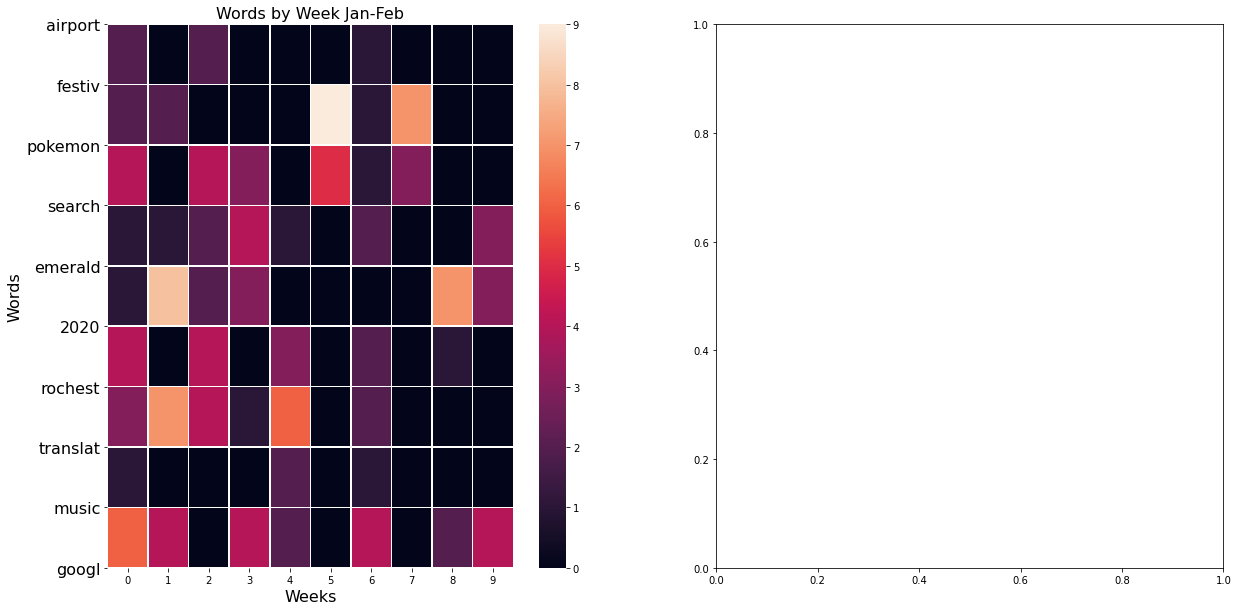

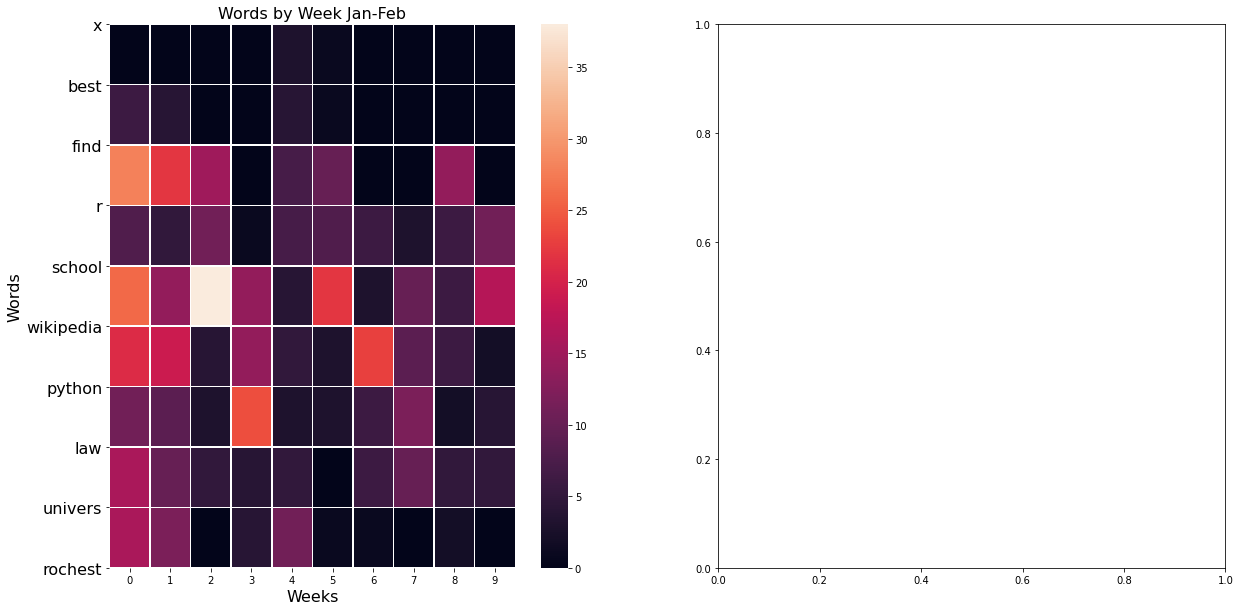

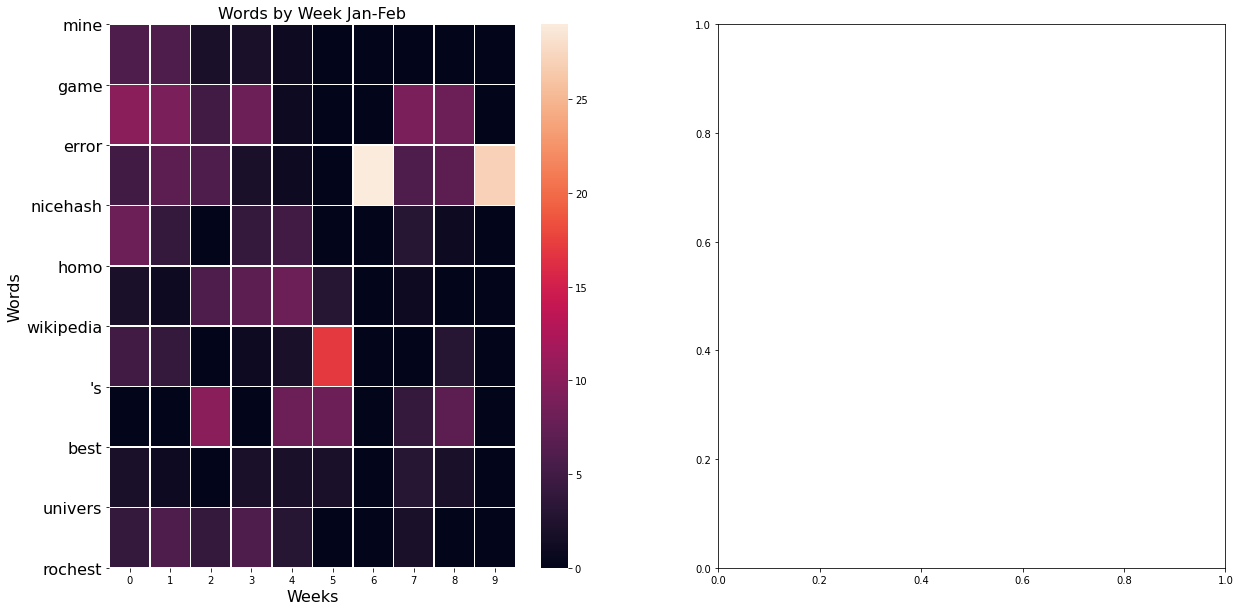

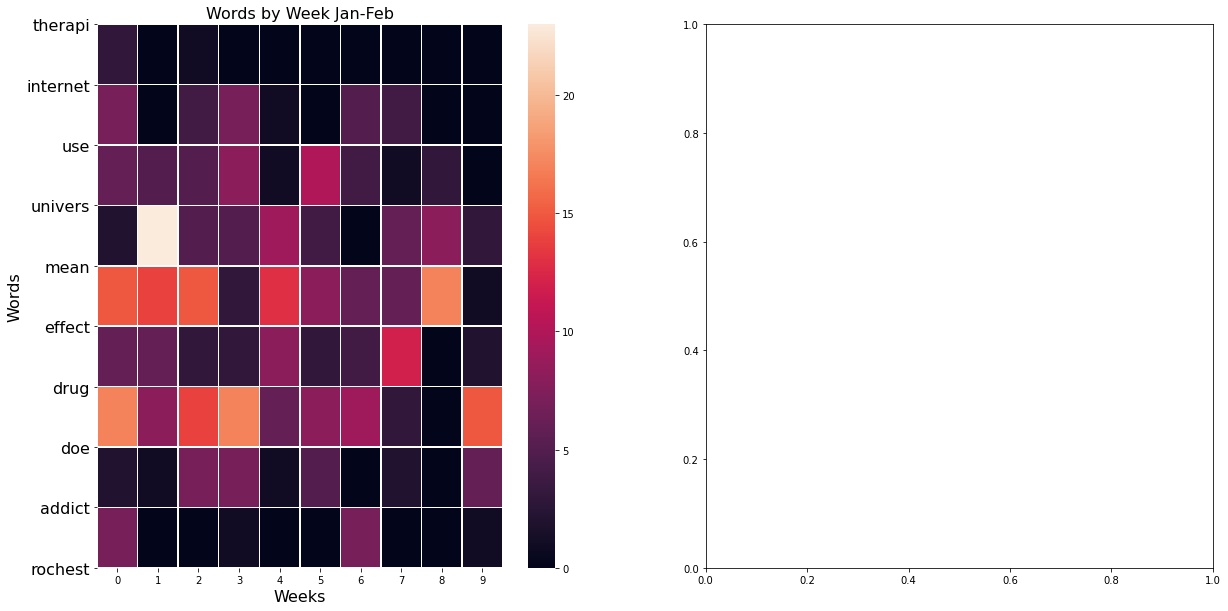

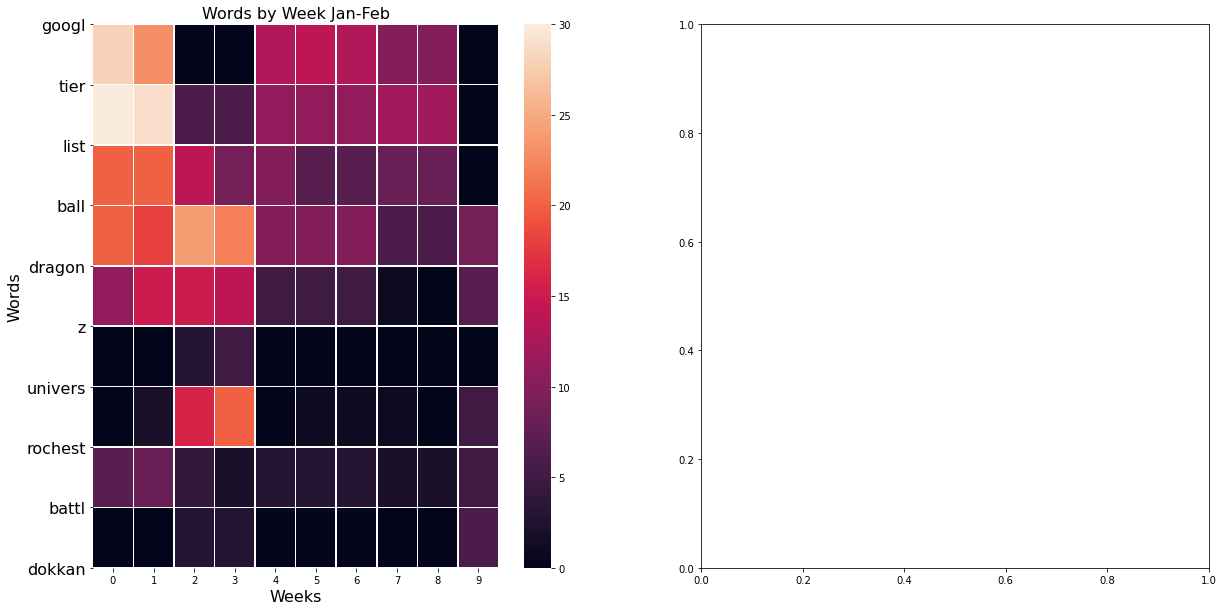

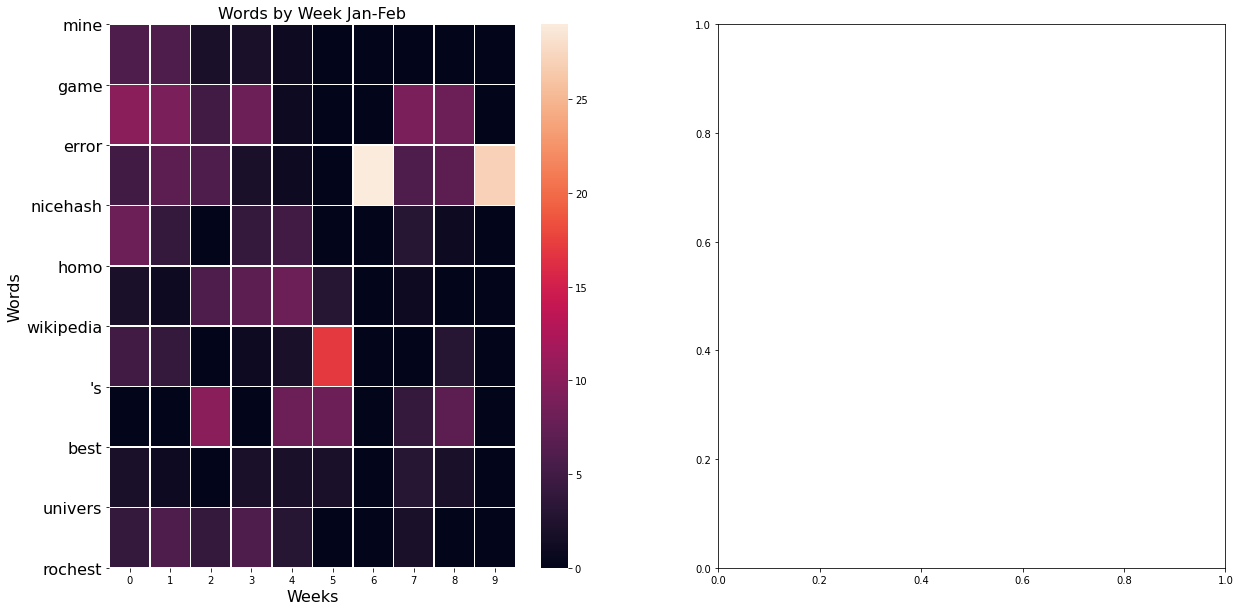

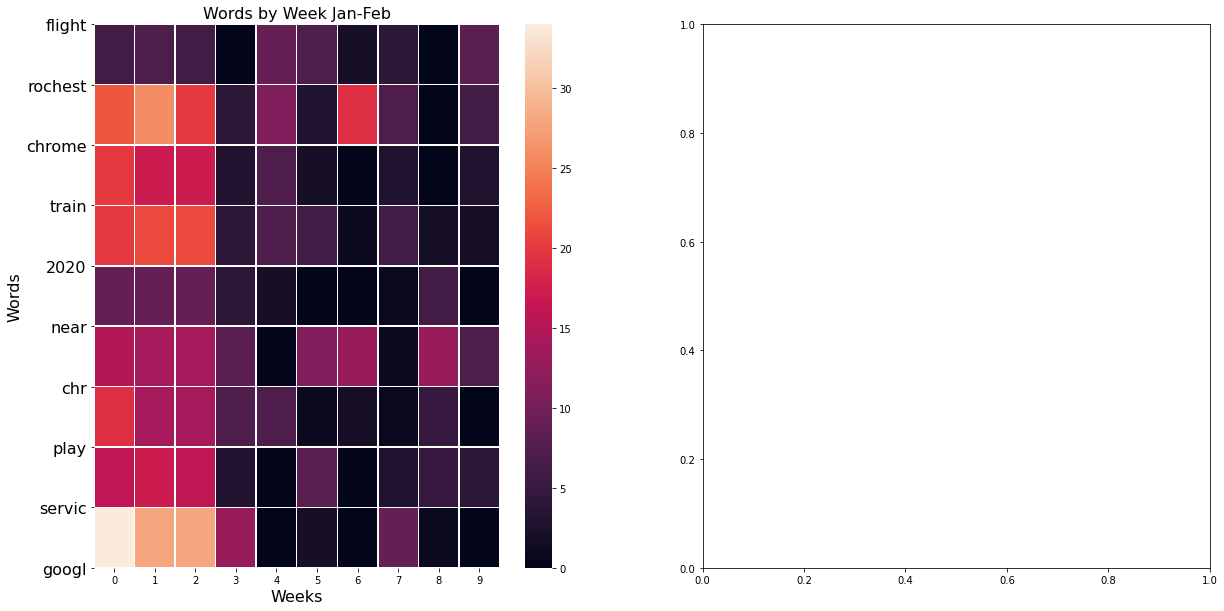

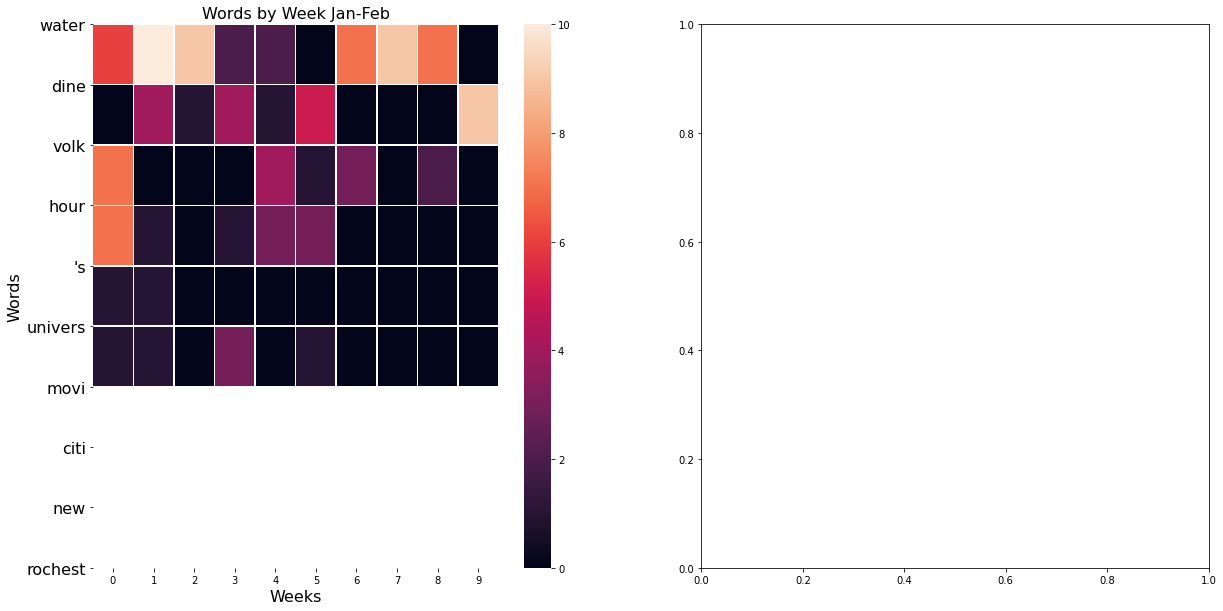

In [72]:
#For each user
files = glob.glob('/Users/miriamblumenthal/Desktop/Desktop/GoogleTake2/search+youtube_v4/*.csv')

count = 0
for f in files:
    id_ = f.split('/')[-1].split('.')[0]
    frame = pd.read_csv(f)
    jan_feb = df_jan_feb(frame)
#     mar_ap = df_mar_ap(frame)
    
#     print(get_counts(jan_feb))
#     print(get_counts(mar_ap))
    f, axes = plt.subplots(1, 2, figsize=(20, 10))
    jan_feb_list = np.array(get_counts(jan_feb))
#     mar_ap_list = np.array(get_counts(mar_ap))
#     print(jan_feb_list)
    
    if jan_feb_list.sum() > 0:
        sns.heatmap(jan_feb_list,linewidths=.5,ax=axes[0])
        axes[0].set_xlabel('Weeks', fontsize=16)
        axes[0].set_ylabel('Words', fontsize=16)
        axes[0].set_yticks([9,8,7,6,5,4,3,2,1,0])

        word_list = top_ten(tokenize_stem(jan_feb))
        axes[0].set_yticklabels(word_list, fontsize=16, rotation=360)
        axes[0].set_title('Words by Week Jan-Feb', fontsize=16)
    count += 1
    
    if count > 10:
        break
    



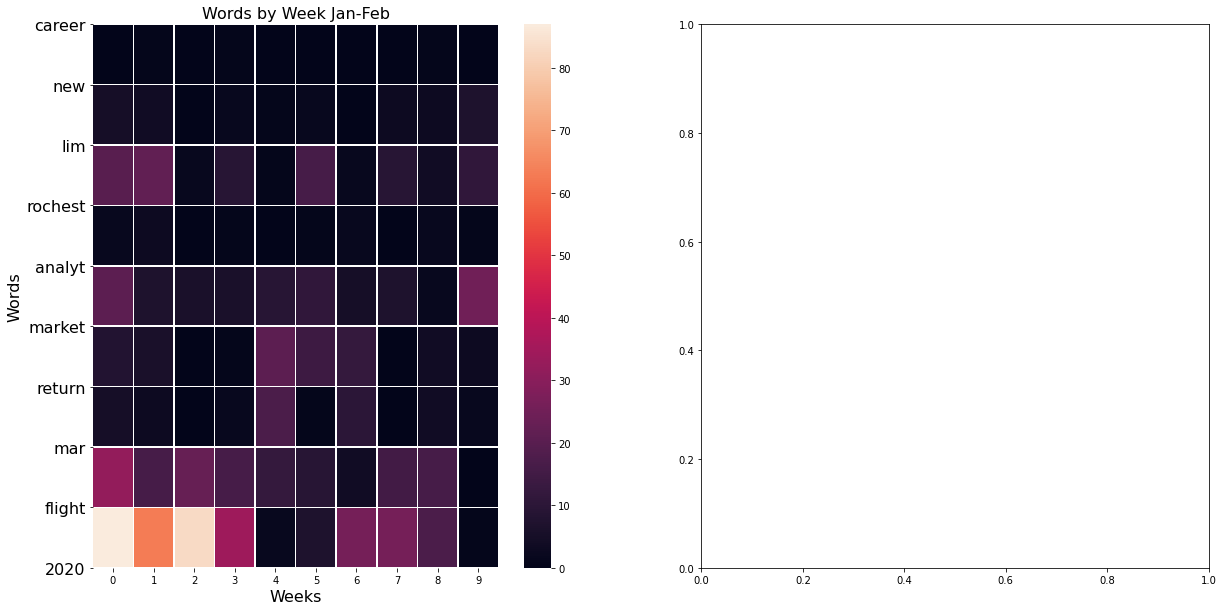

In [63]:
# #For each user
# files = '/Users/miriamblumenthal/Desktop/Desktop/GoogleTake2/search+youtube_v4/8_41.csv'



# #     id_ = f.split('/')[-1].split('.')[0]
# frame = pd.read_csv(files)
# jan_feb = df_jan_feb(frame)
# mar_ap = df_mar_ap(frame)

# #     print(get_counts(jan_feb))
# #     print(get_counts(mar_ap))
# files, axes = plt.subplots(1, 2, figsize=(20, 10))
# jan_feb_list = np.array(get_counts(jan_feb))
# mar_ap_list = np.array(get_counts(mar_ap))
# #     print(jan_feb_list)

# if jan_feb_list.sum() > 0:
#     sns.heatmap(jan_feb_list,linewidths=.5,ax=axes[0])
#     axes[0].set_xlabel('Weeks', fontsize=16)
#     axes[0].set_ylabel('Words', fontsize=16)
#     axes[0].set_yticks([9,8,7,6,5,4,3,2,1,0])

#     word_list = top_ten(tokenize_stem(jan_feb))
#     axes[0].set_yticklabels(word_list, fontsize=16, rotation=360)
#     axes[0].set_title('Words by Week Jan-Feb', fontsize=16)
    
        

/Users/miriamblumenthal/opt/anaconda3/envs/covidProject/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


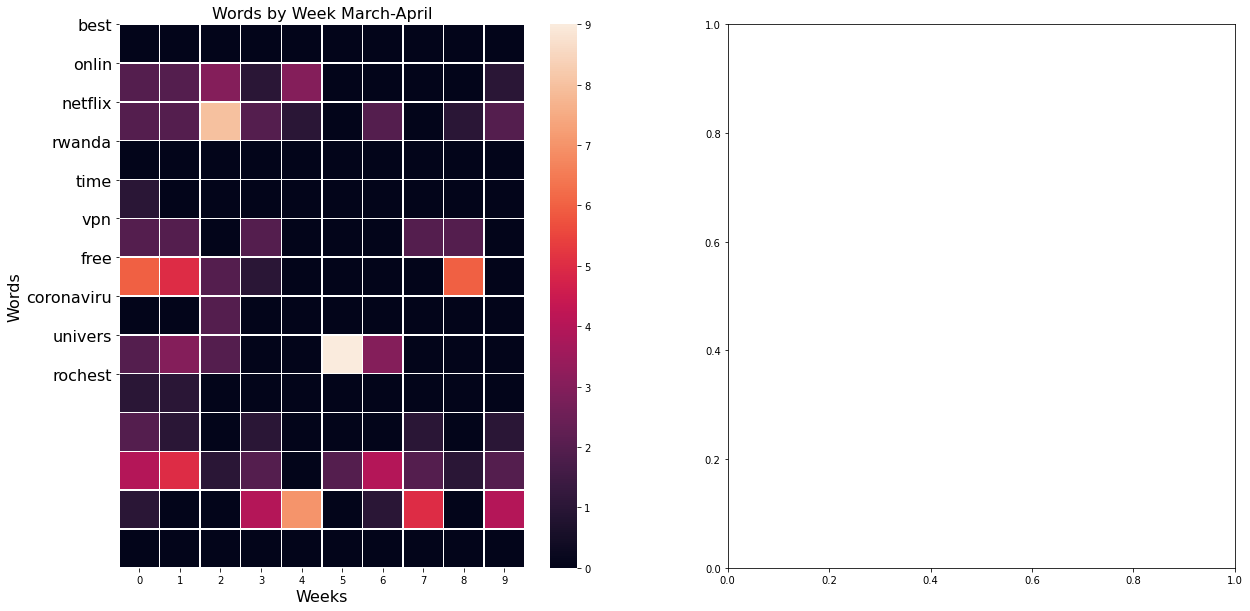

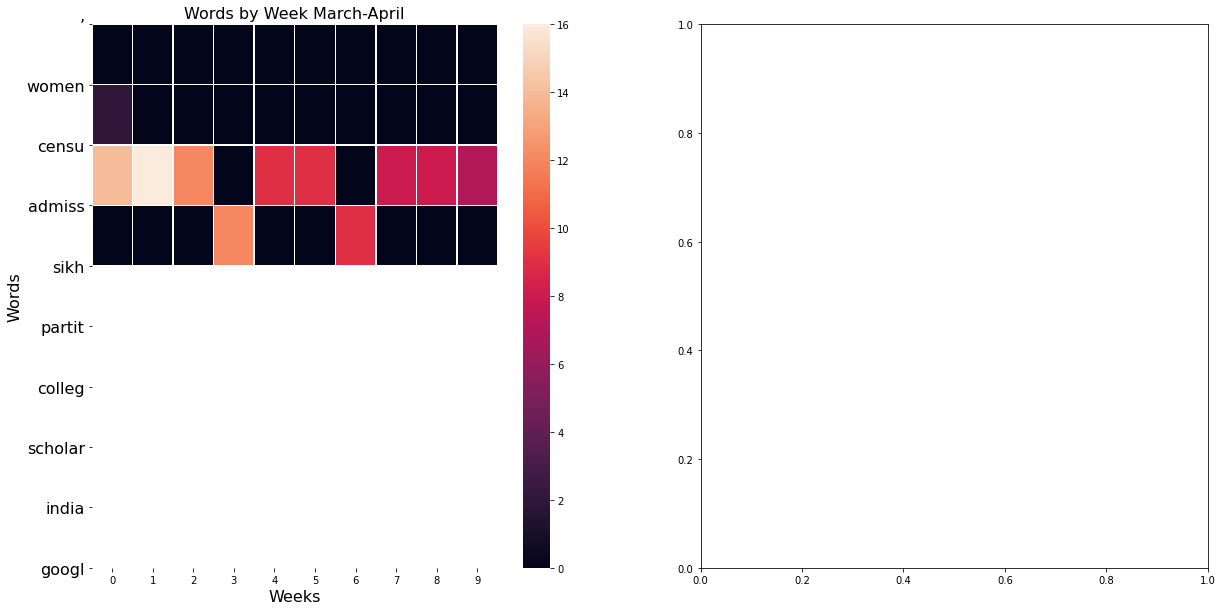

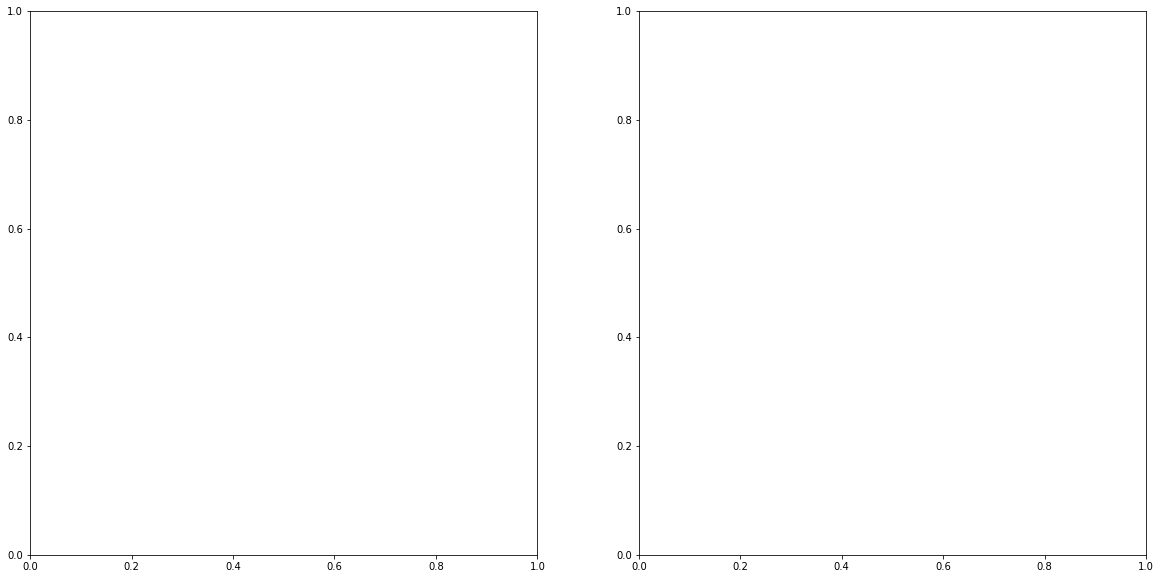

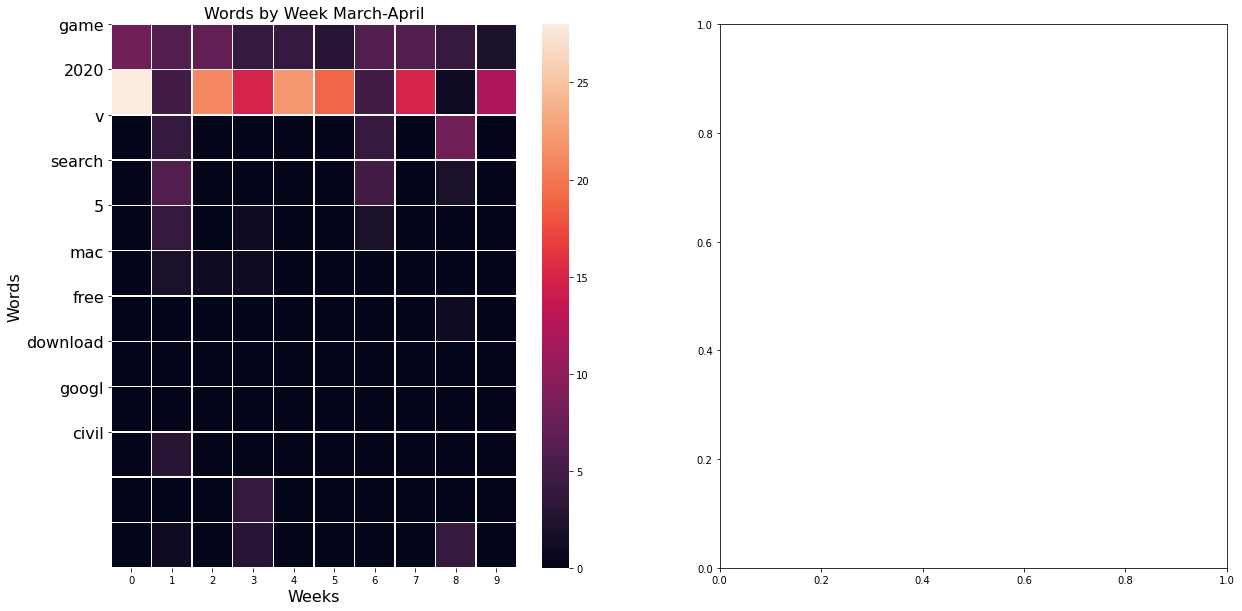

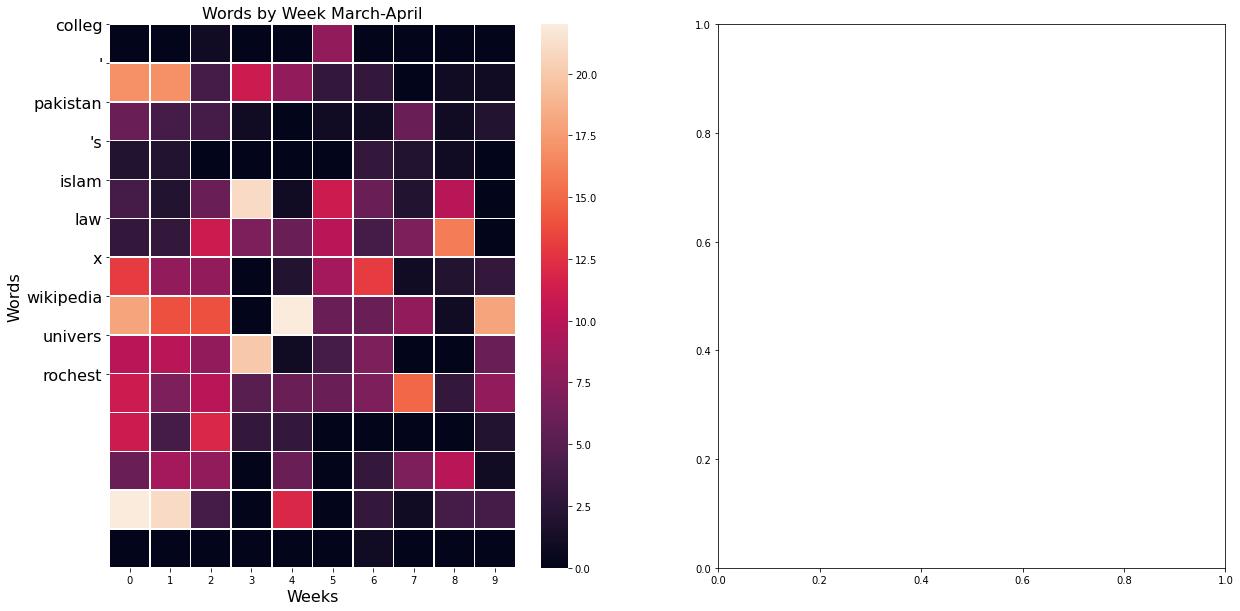

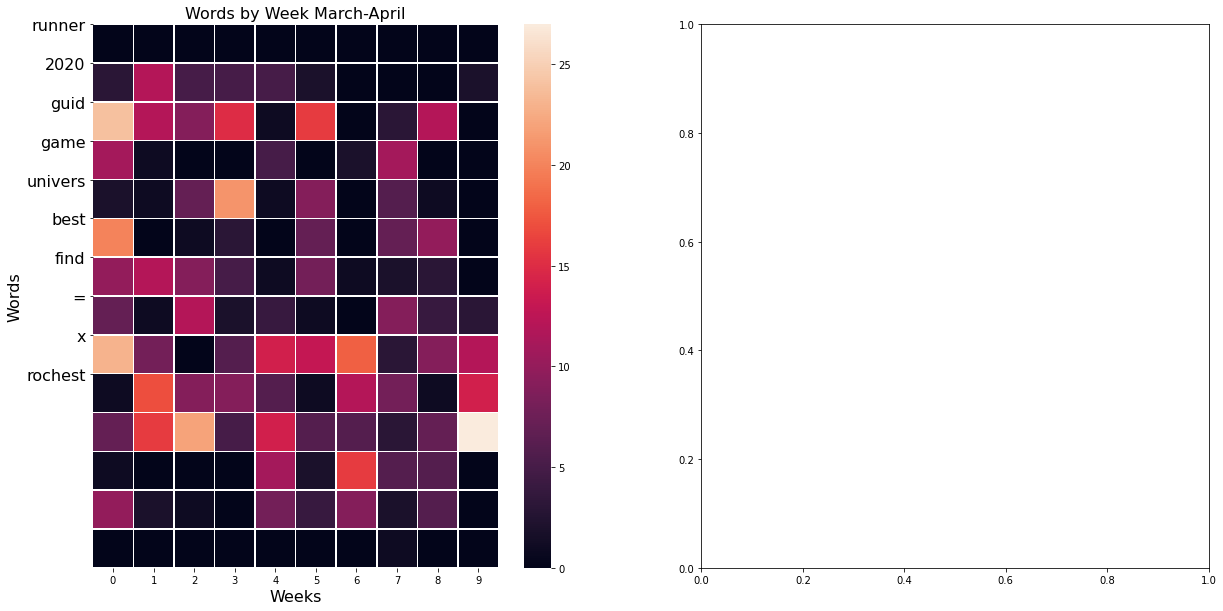

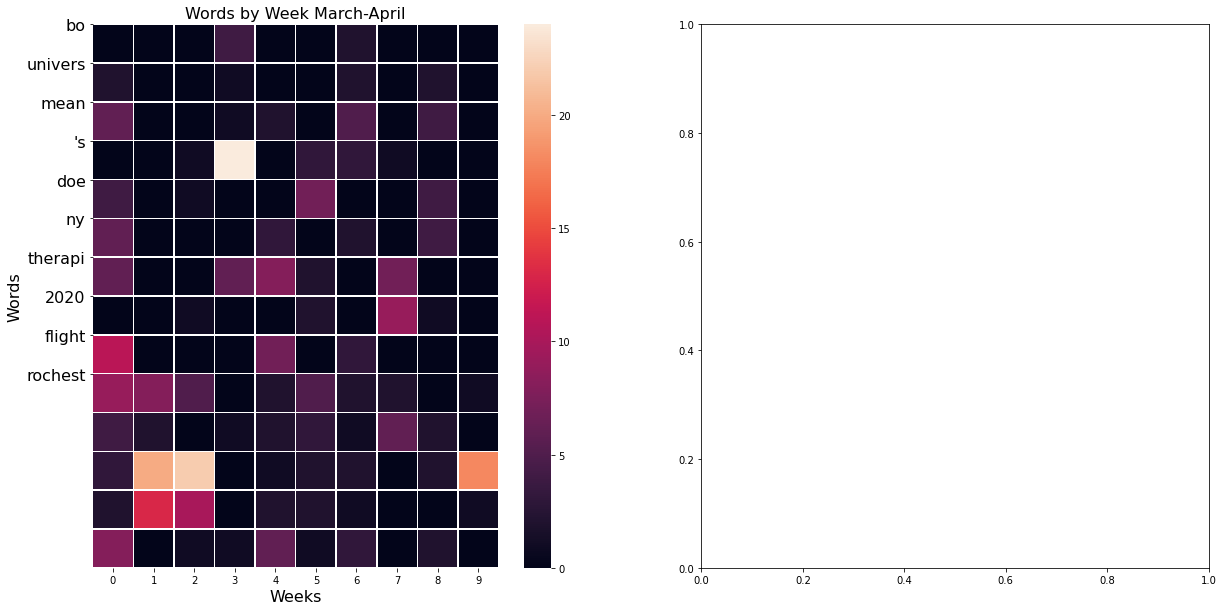

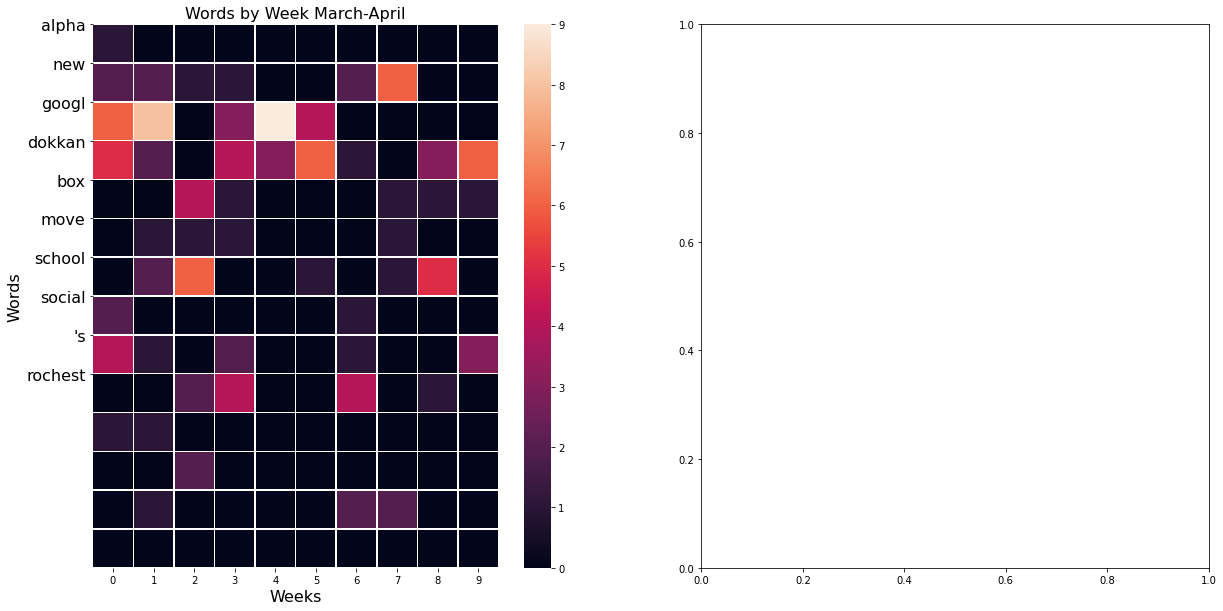

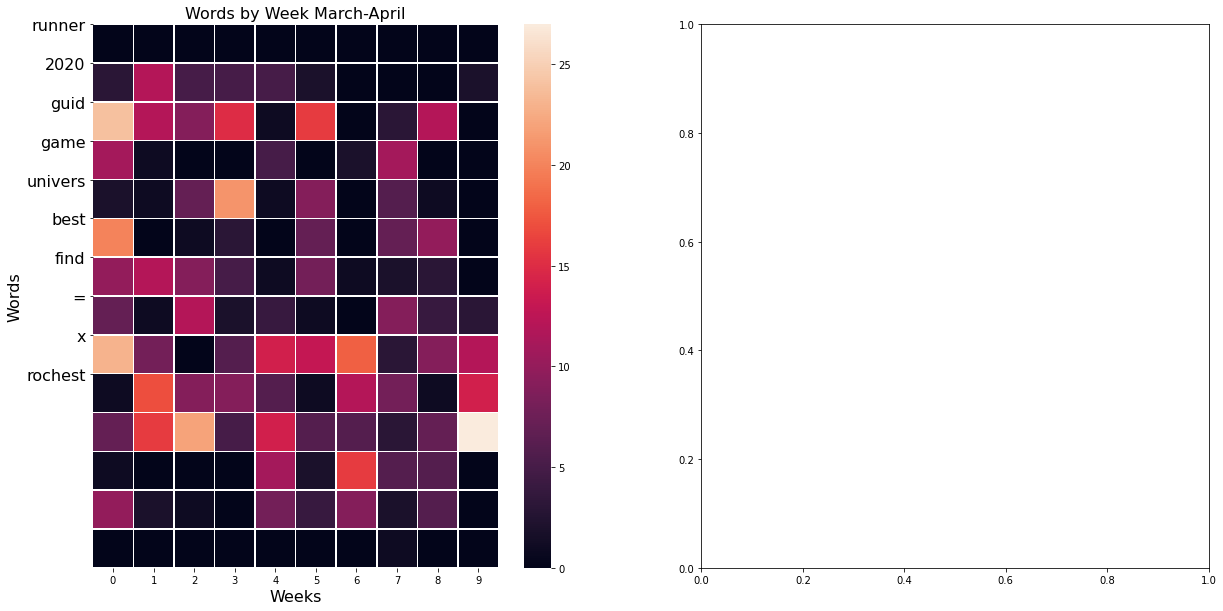

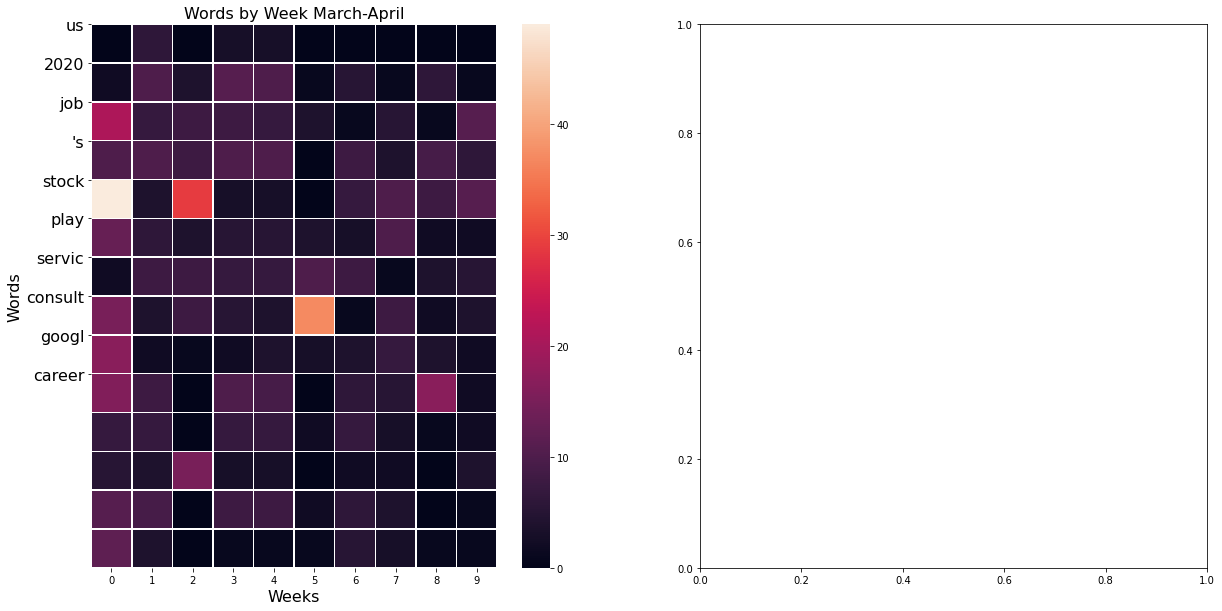

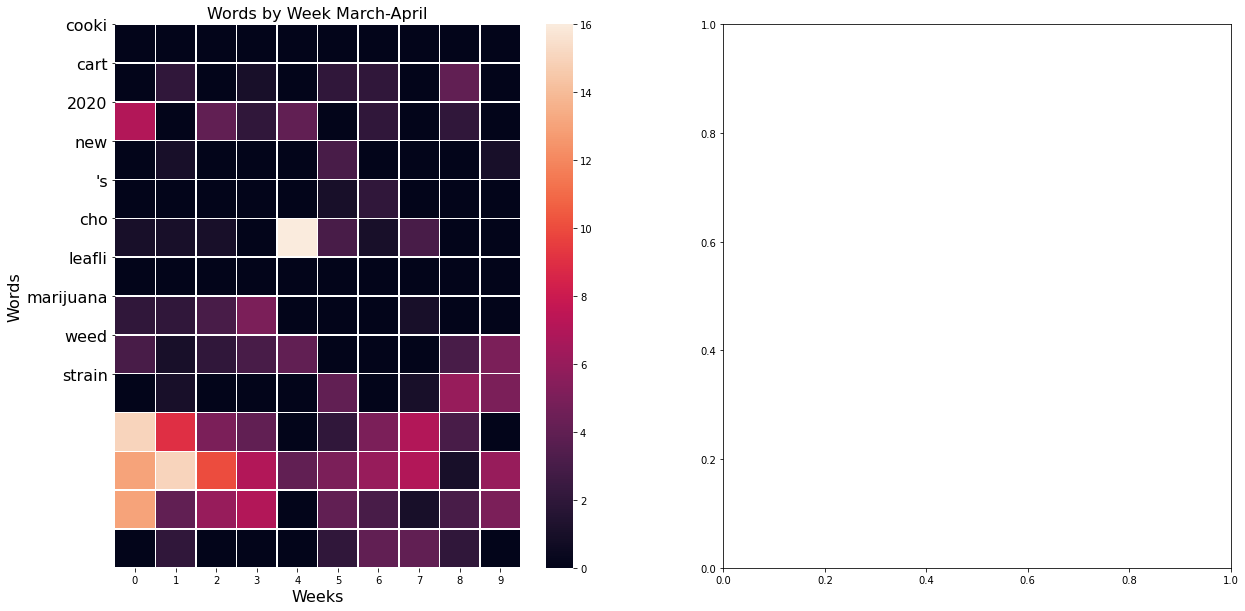

In [84]:
#For each user
files = glob.glob('/Users/miriamblumenthal/Desktop/Desktop/GoogleTake2/search+youtube_v4/*.csv')

count = 0
for f in files:
    id_ = f.split('/')[-1].split('.')[0]
    frame = pd.read_csv(f)
#     jan_feb = df_jan_feb(frame)
    mar_ap = df_mar_ap(frame)
    
#     print(get_counts(jan_feb))
#     print(get_counts(mar_ap))
    f, axes = plt.subplots(1, 2, figsize=(20, 10))
#     jan_feb_list = np.array(get_counts(jan_feb))
    mar_ap_list = np.array(get_counts(mar_ap))

    
    if mar_ap_list.sum() > 0:
        sns.heatmap(mar_ap_list,linewidths=.5,ax=axes[0])
        axes[0].set_xlabel('Weeks', fontsize=16)
        axes[0].set_ylabel('Words', fontsize=16)
        axes[0].set_yticks([9,8,7,6,5,4,3,2,1,0])

        word_list = top_ten(tokenize_stem(mar_ap))
        axes[0].set_yticklabels(word_list, fontsize=16, rotation=360)
        axes[0].set_title('Words by Week March-April', fontsize=16)
    count += 1
    
    if count > 10:
        break
    


    